# DATA PROYECT

In [67]:
import pandas as pd
import statistics as st
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings("ignore")

In [68]:
path_data = '../data/marketing_AB.csv' #ruta de la data
data_proyect = pd.read_csv(path_data)  #cargar data
data_proyect.head() #data oficial

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## CLEAN DATA

In [69]:
data_proyect.columns #campos de la data

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [70]:
df_workProyect = data_proyect.copy() #crear data de trabajo
df_workProyect = df_workProyect.drop('Unnamed: 0', axis=1) #eliminar campo no necesario
df_workProyect = df_workProyect.set_index('user id') #establece ID como indice de la data de trabajo
df_workProyect.head() #mostrar cabecera

,test group,converted,total ads,most ads day,most ads hour
user id,,,,,
1069124,ad,False,130,Monday,20
1119715,ad,False,93,Tuesday,22
1144181,ad,False,21,Tuesday,18
1435133,ad,False,355,Tuesday,10
1015700,ad,False,276,Friday,14


In [71]:
df_workProyect.shape #forma data

(588101, 5)

In [72]:
df_workProyect.info() #info de la data
#NO HAY VALORES FALTANTES, TODOS LOS CAMPOS SE ENCUENTRAN COMPLETOS

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 1069124 to 1237779
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 23.0+ MB


In [73]:
df_workProyect.describe() #info de las variables cuantitativas

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


In [74]:
print(f'Antes de filas repetidas: {df_workProyect.shape}')
df_workProyect.drop_duplicates(inplace=True)
print(f'Despues de filas repetidas: {df_workProyect.shape}')

#Existian filas de igual valor

Antes de filas repetidas: (588101, 5)
Despues de filas repetidas: (44478, 5)


In [75]:
#FILTRADO
df_workProyect.loc[(df_workProyect.converted == True),  'converted'] = 1
df_workProyect.loc[(df_workProyect.converted == False),  'converted'] = 0
df_workProyect["converted"] = df_workProyect["converted"].astype(int)

In [76]:
def q01(x): return x.quantile(0.01)
def q50(x): return x.quantile(0.50)
def q99(x): return x.quantile(0.99)
df_workProyect.agg({'total ads':['mean',q50,'min',q01,'max',q99],
                    'most ads hour':['mean',q50,'min',q01,'max',q99]}).T

,mean,q50,min,q01,max,q99
total ads,102.445861,72.0,1.0,2.0,2065.0,545.23
most ads hour,13.639912,14.0,0.0,0.0,23.0,23.00


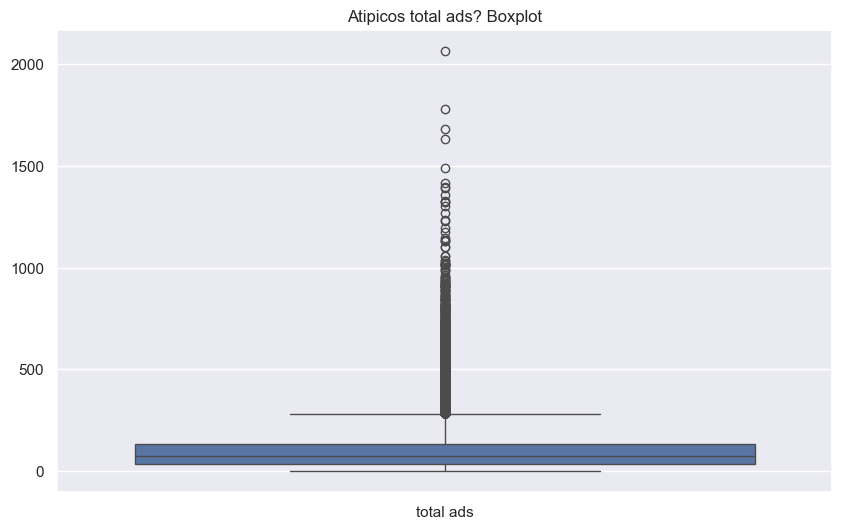

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_workProyect[['total ads']])
plt.title('Atipicos total ads? Boxplot')
plt.show()

In [78]:
#PRIMERO VEMOS LA GRAFICA PARA LUEGO SELECCIONAR LA SECCION QUE NOS SERVIRA COMO DATOS
def drop_outlier(df_workProyect, col):
    Q1 = df_workProyect[col].quantile(0.25)
    Q3 = df_workProyect[col].quantile(0.75)
    IQR = Q3 - Q1
    down_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    
    df_workProyect = df_workProyect[~((df_workProyect[col] < down_limit) | (df_workProyect[col] > up_limit))]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_workProyect[[col]])
    plt.title(f'{col} Boxplot')
    plt.show()
    return df_workProyect

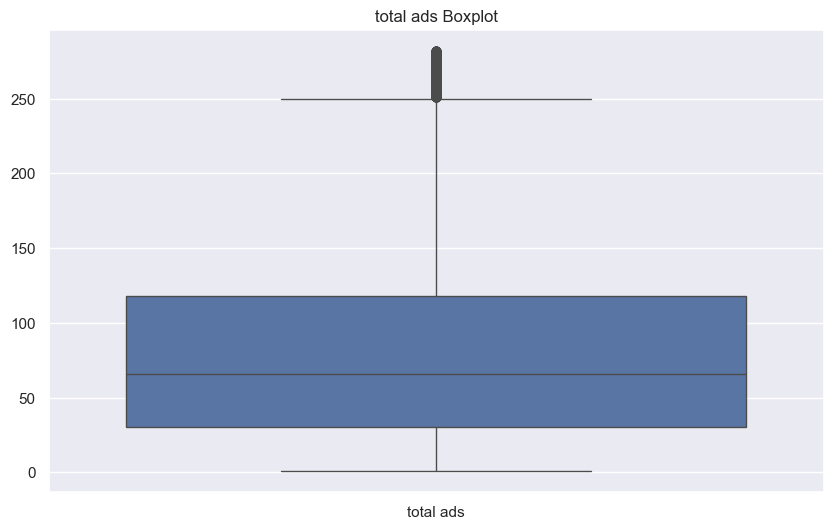

In [79]:
df_workProyect = drop_outlier(df_workProyect, 'total ads')

In [80]:
df_workProyect.agg({'total ads':['mean',q50,'min',q01,'max',q99]}).T

,mean,q50,min,q01,max,q99
total ads,81.532263,66.0,1.0,2.0,282.0,264.0


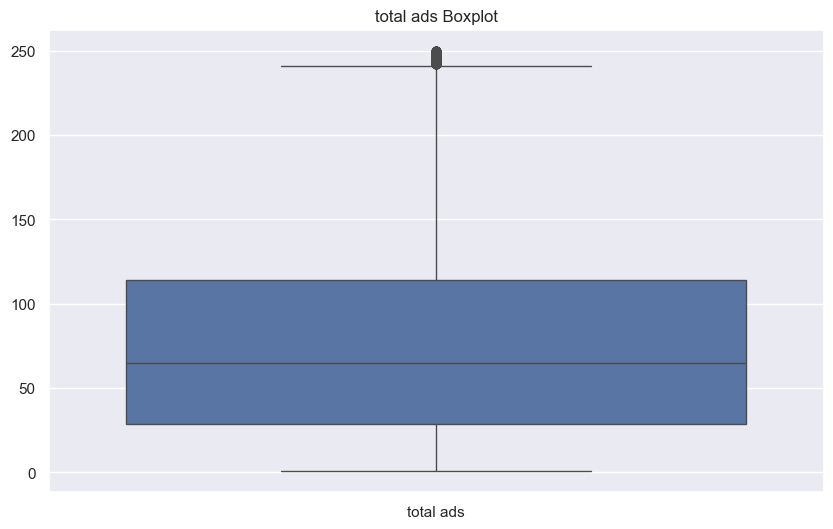

In [81]:
df_workProyect = drop_outlier(df_workProyect, 'total ads')

In [82]:
df_workProyect.agg({'total ads':['mean',q50,'min',q01,'max',q99]}).T

,mean,q50,min,q01,max,q99
total ads,78.143097,65.0,1.0,2.0,250.0,238.0


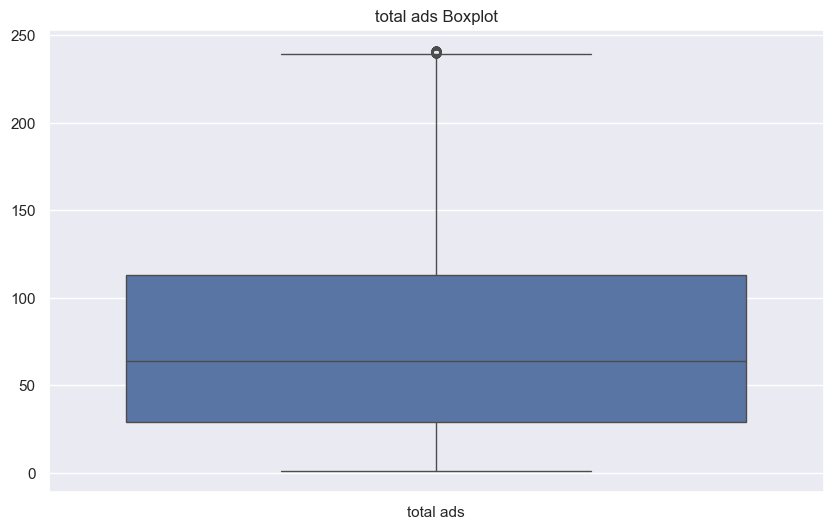

In [83]:
df_workProyect = drop_outlier(df_workProyect, 'total ads')

In [84]:
df_workProyect.agg({'total ads':['mean',q50,'min',q01,'max',q99]}).T

,mean,q50,min,q01,max,q99
total ads,77.032694,64.0,1.0,2.0,241.0,230.0


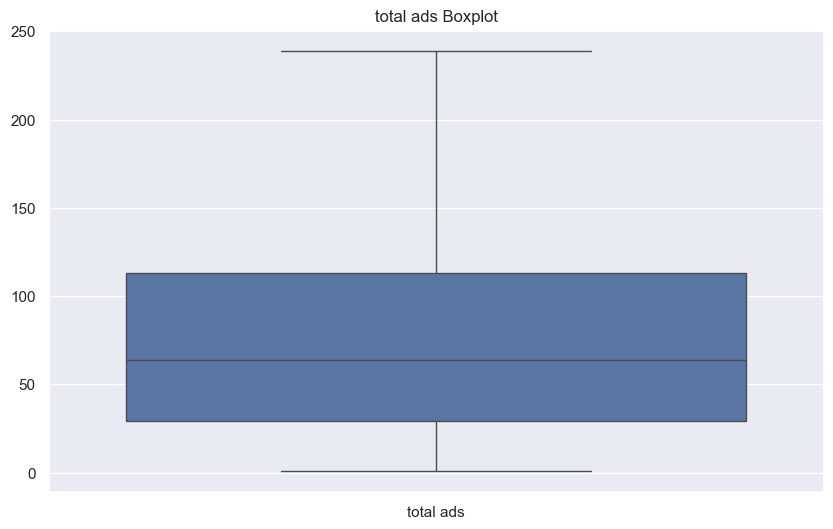

In [85]:
df_workProyect = drop_outlier(df_workProyect, 'total ads')

In [86]:
df_workProyect.agg({'total ads':['mean',q50,'min',q01,'max',q99]}).T

# SE DEBE CONSIDERAR LA VARIABILIDAD DE LOS DATOS, POR LO PRONTO NO HAY ATIPICOS 

,mean,q50,min,q01,max,q99
total ads,76.751609,64.0,1.0,2.0,239.0,228.0


In [87]:
print(df_workProyect.index.shape)
print(df_workProyect.index.unique().shape)
#no hay valores retidos

(40702,)
(40702,)


In [88]:
def q01(x): return x.quantile(0.01)
def q50(x): return x.quantile(0.50)
def q99(x): return x.quantile(0.99)
df_workProyect.agg({'total ads':['mean',q50,'min',q01,'max',q99],
                    'most ads hour':['mean',q50,'min',q01,'max',q99]}).T

,mean,q50,min,q01,max,q99
total ads,76.751609,64.0,1.0,2.0,239.0,228.0
most ads hour,13.608226,14.0,0.0,0.0,23.0,23.0


## DATA ANALISYS
### Calculo de estadísticos
- Medidas de Tendencia Central
- Medidas de Posición
- Medidas de Dispersión
- Medidas de Forma

### Medidas de Tendencia Central

In [89]:
dataframe=df_workProyect.select_dtypes(include = [float, int])
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
converted,40702.0,0.241389,0.427931,0.0,0.0,0.0,0.0,1.0
total ads,40702.0,76.751609,57.977489,1.0,29.0,64.0,113.0,239.0
most ads hour,40702.0,13.608226,5.908874,0.0,10.0,14.0,18.0,23.0


In [90]:
# Media
media= st.mean(df_workProyect['total ads'])
print('Media:', media)

# Mediana
mediana= st.median(df_workProyect['total ads'])
print('Mediana:', mediana)

# Moda
moda= st.mode(df_workProyect['total ads'])
print('Moda:', moda)

Media: 76.75160925753035
Mediana: 64.0
Moda: 24


In [91]:
# Media
media= st.mean(df_workProyect['most ads hour'])
print('Media:', media)

# Mediana
mediana= st.median(df_workProyect['most ads hour'])
print('Mediana:', mediana)

# Moda
moda= st.mode(df_workProyect['most ads hour'])
print('Moda:', moda)

Media: 13.60822564001769
Mediana: 14.0
Moda: 13


### Medidas de Posición

In [92]:
# Cuartiles
df_workProyect['total ads'].quantile([0.25,0.5,0.75])

0.25     29.0
0.50     64.0
0.75    113.0
Name: total ads, dtype: float64

In [93]:
# Deciles
df_workProyect['total ads'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90])

0.1     12.0
0.2     23.0
0.3     35.0
0.4     49.0
0.5     64.0
0.6     81.0
0.7    101.0
0.8    126.0
0.9    165.0
Name: total ads, dtype: float64

In [94]:
# Percentiles

# Percentil 5
print("Percentil 5:",np.percentile( df_workProyect['total ads'], 5))
# Percentil 50
print("Percentil 50:",np.percentile(df_workProyect['total ads'], 50))
# Percentil 90
print("Percentil 95:",np.percentile(df_workProyect['total ads'], 95))

Percentil 5: 6.0
Percentil 50: 64.0
Percentil 95: 194.0


In [95]:
# Cuartiles
df_workProyect['most ads hour'].quantile([0.25,0.5,0.75])

0.25    10.0
0.50    14.0
0.75    18.0
Name: most ads hour, dtype: float64

In [96]:
# Deciles
df_workProyect['most ads hour'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.1     5.0
0.2     9.0
0.3    11.0
0.4    12.0
0.5    14.0
0.6    16.0
0.7    17.0
0.8    19.0
0.9    21.0
Name: most ads hour, dtype: float64

In [97]:
# Percentiles

# Percentil 5
print("Percentil 5:",np.percentile( df_workProyect['most ads hour'], 5))
# Percentil 50
print("Percentil 50:",np.percentile(df_workProyect['most ads hour'], 50))
# Percentil 90
print("Percentil 95:",np.percentile(df_workProyect['most ads hour'], 95))

Percentil 5: 2.0
Percentil 50: 14.0
Percentil 95: 22.0


### Medidas de Dispersión

In [98]:
print(f"VARIANZA: {np.var(df_workProyect['total ads'])}")
print(f"DESVIACIÓN ESTÁNDAR: {np.std(df_workProyect['total ads'])}")
print("MAX:",max(df_workProyect['total ads']))
print("MIN:",min(df_workProyect['total ads']))
print("RANGO:",max(df_workProyect['total ads'])-min(df_workProyect['total ads']))

VARIANZA: 3361.3065886097397
DESVIACIÓN ESTÁNDAR: 57.976776286800735
MAX: 239
MIN: 1
RANGO: 238


In [99]:
print(f"VARIANZA: {np.var(df_workProyect['most ads hour'])}")
print(f"DESVIACIÓN ESTÁNDAR: {np.std(df_workProyect['most ads hour'])}")
print("MAX:",max(df_workProyect['most ads hour']))
print("MIN:",min(df_workProyect['most ads hour']))
print("RANGO:",max(df_workProyect['most ads hour'])-min(df_workProyect['most ads hour']))

VARIANZA: 34.91392968541403
DESVIACIÓN ESTÁNDAR: 5.90880103620134
MAX: 23
MIN: 0
RANGO: 23


### Medidas de Forma

In [100]:
print(skew(df_workProyect['total ads'], bias=False))
print(skew(df_workProyect['most ads hour'], bias=False))

0.7948662722286618
-0.42890914611789416


In [101]:
print(kurtosis(df_workProyect['total ads'], fisher=False))#segun Pearson
print(kurtosis(df_workProyect['total ads'], fisher=True))#Segun Feasher

2.8249137464151697
-0.17508625358483032


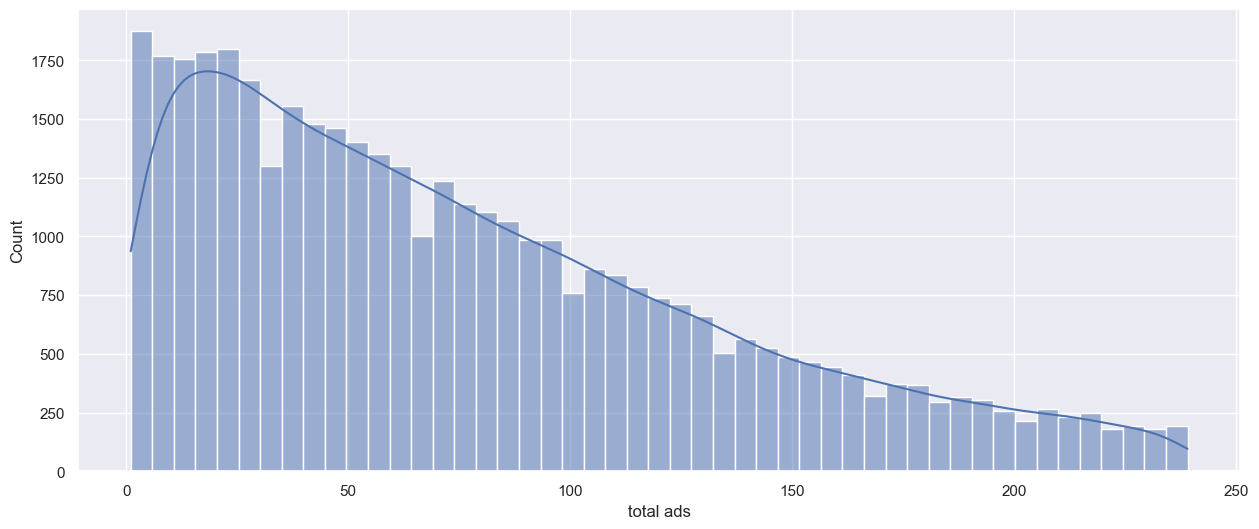

In [102]:
sns.histplot(data=df_workProyect,x='total ads', kde=True)

plt.show()

In [103]:
print(kurtosis(df_workProyect['most ads hour'], fisher=False))#segun Pearson
print(kurtosis(df_workProyect['most ads hour'], fisher=True))#Segun Feasher

2.5188607643604275
-0.4811392356395725


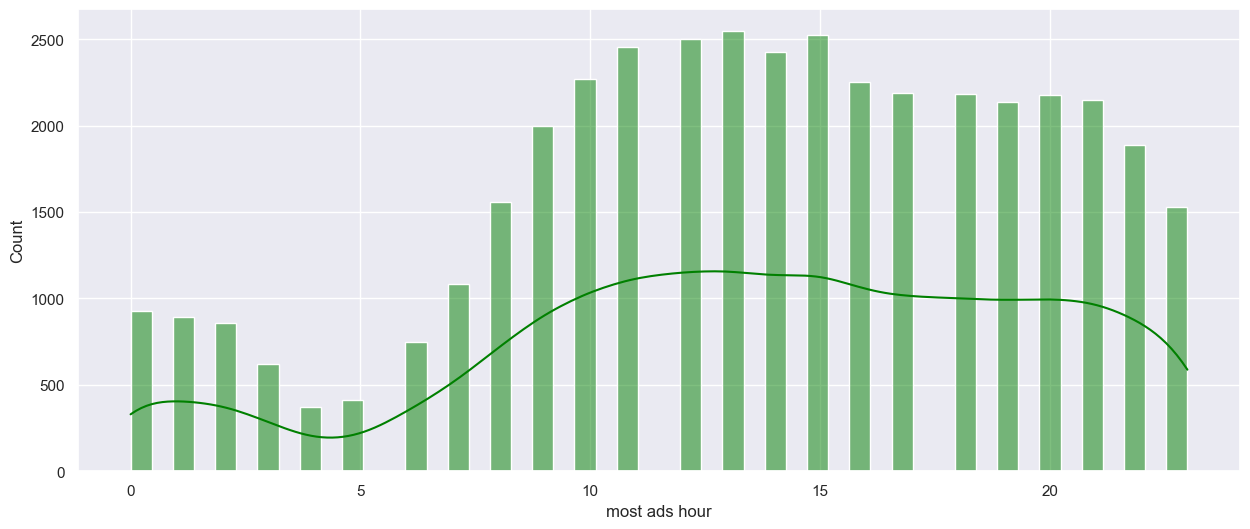

In [104]:
sns.histplot(data=df_workProyect,x='most ads hour', kde=True, color='green')

plt.show()

## ANSWERS AND GRAPHICS

### 1 ¿Mayor éxito los anuncios “ad” o “psa”?

In [105]:
df_workProyect['test group'].value_counts()

test group
ad     33130
psa     7572
Name: count, dtype: int64

In [106]:
df_workProyect.groupby('test group')['total ads'].mean().reset_index().set_index('test group')

,total ads
test group,
ad,83.898219
psa,45.482831


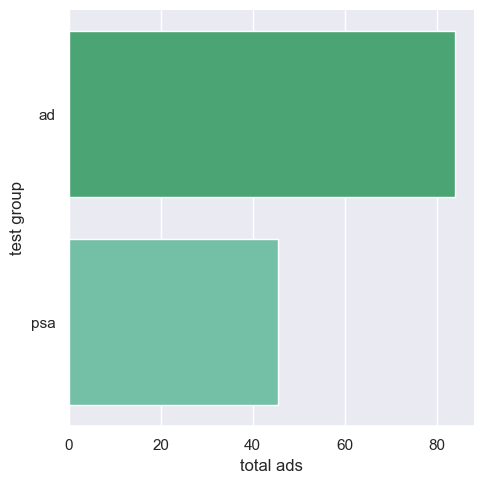

In [107]:
sns.catplot(x="total ads",
            y="test group",
            data=df_workProyect,
            kind="bar",
            ci=None,
            palette=['mediumseagreen','mediumaquamarine'])
plt.show()

### 2 ¿Cuál es el mejor horario para anuncios?

In [108]:
df_workProyect.groupby('most ads hour')['total ads'].mean().reset_index().set_index('most ads hour')

,total ads
most ads hour,
0,55.940605
1,58.005605
2,56.613318
3,50.059581
4,44.670270
5,50.353659
6,62.773635
7,68.491682
8,72.452915


<function matplotlib.pyplot.show(close=None, block=None)>

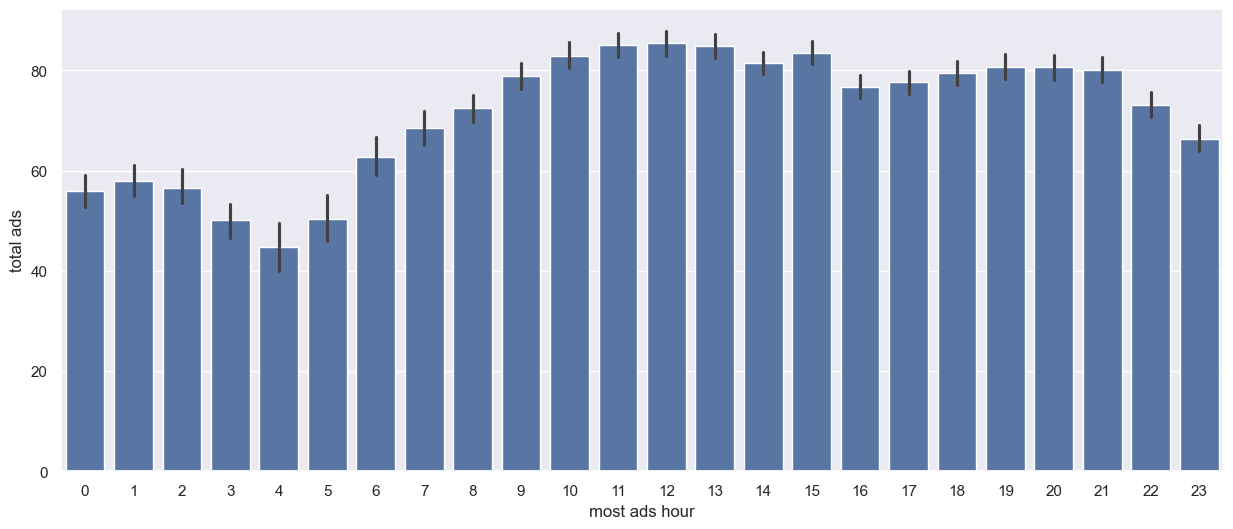

In [109]:
sns.barplot(data=df_workProyect, x="most ads hour", y="total ads")
plt.show

### ¿Cuál es la mejor fecha para anuncios?

In [110]:
df_workProyect.groupby('most ads day')['total ads'].mean().reset_index().set_index('most ads day')

,total ads
most ads day,
Friday,81.344728
Monday,77.608429
Saturday,77.422171
Sunday,76.318848
Thursday,74.737550
Tuesday,73.719035
Wednesday,75.517622


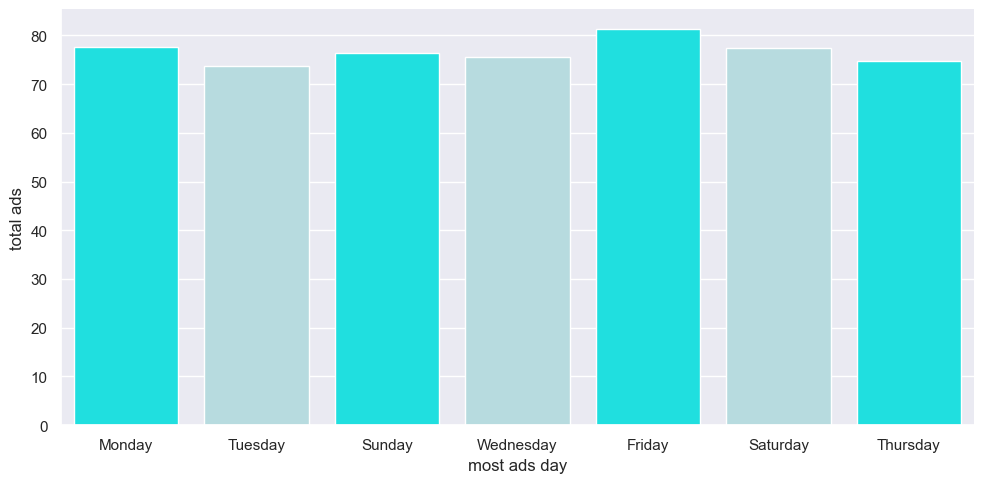

In [111]:
sns.set(rc={'figure.figsize':(15,6)})
sns.catplot(x="most ads day",
            y="total ads",
            data=df_workProyect,
            kind="bar",
            ci=None,
            palette=['aqua','powderblue'],
           aspect=2)

### 4. PREGUNTA: ¿Cual es la cantidad de anuncios ("ad" y "psa") vistos del grupo de prueba para la compra de un producto?

**Conversión por total "ad" y total "psa"**

In [112]:
df_workProyect.groupby(['converted','test group'])['total ads'].count().reset_index()

,converted,test group,total ads
0,0,ad,23693
1,0,psa,7184
2,1,ad,9437
3,1,psa,388


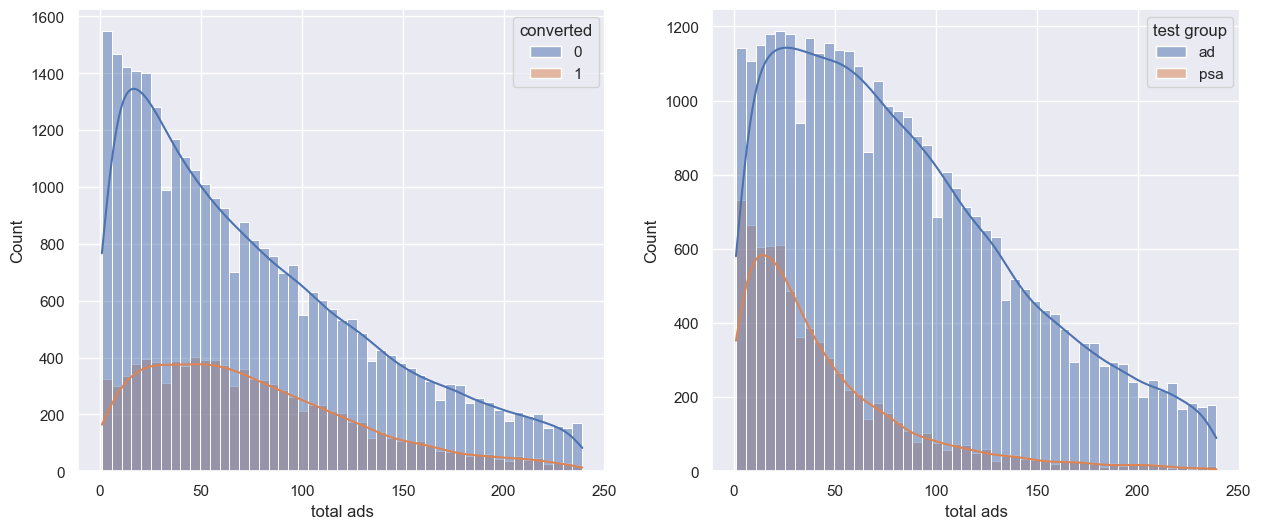

In [113]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=df_workProyect,x='total ads', kde=True,hue='converted')

plt.subplot(1,2,2)
sns.histplot(data=df_workProyect,x='total ads', kde=True,hue='test group')
plt.show()

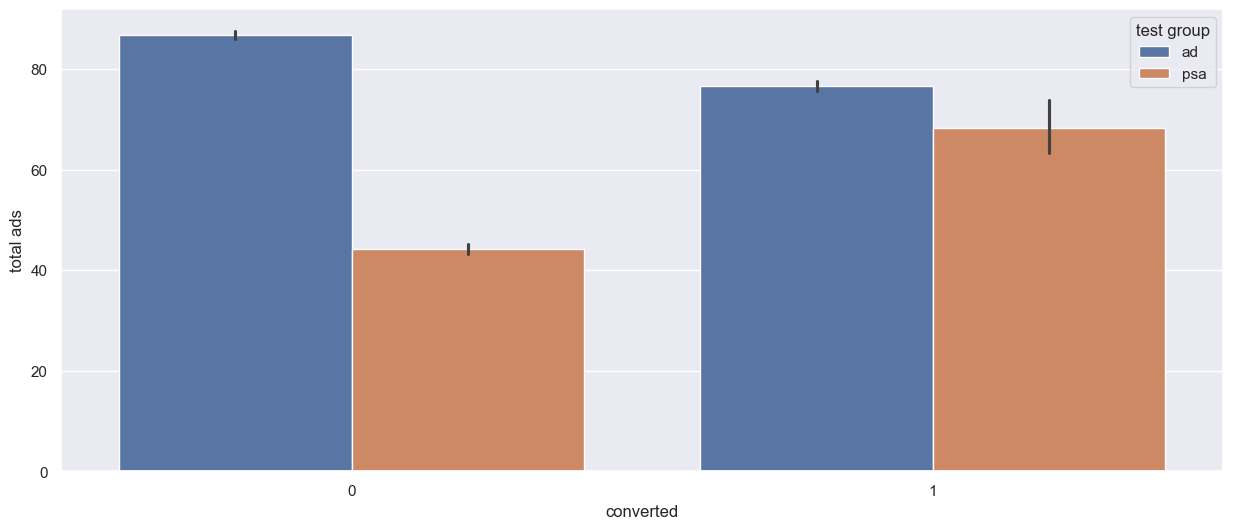

In [114]:
sns.barplot(df_workProyect, x = 'converted', y = 'total ads', hue = 'test group');

**Relación entre "psa" y "ad" vistas con más "ad" en el día en función al grupo testeado**

In [115]:
df_groupby = df_workProyect.groupby(["test group","most ads day"]).agg({"total ads":"mean", "converted":"sum"}).reset_index()
df_groupby

,test group,most ads day,total ads,converted
0,ad,Friday,89.061324,1371
1,ad,Monday,84.384553,1608
2,ad,Saturday,84.504253,1183
3,ad,Sunday,83.520763,1359
4,ad,Thursday,82.240080,1195
5,ad,Tuesday,80.449584,1413
6,ad,Wednesday,82.484419,1308
7,psa,Friday,47.274221,57
8,psa,Monday,45.673934,70
9,psa,Saturday,46.846516,37


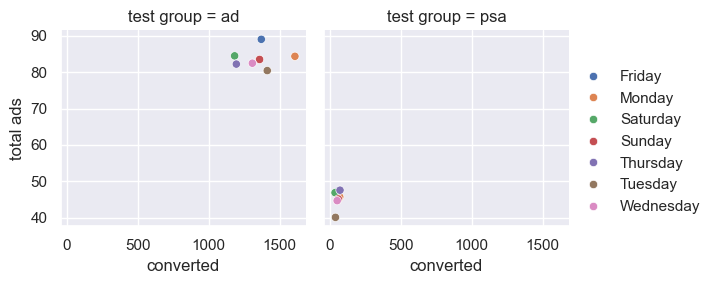

In [116]:
g = sns.FacetGrid(df_groupby, col="test group")
g.map(sns.scatterplot, 'converted', 'total ads', 'most ads day')
g.add_legend()
plt.show()

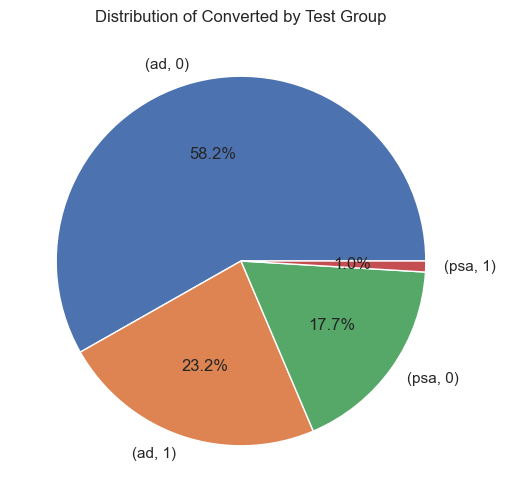

In [117]:
grouped_counts = df_workProyect.groupby('test group')['converted'].value_counts()
grouped_counts

# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (6,6),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

# Show the plot
plt.show()

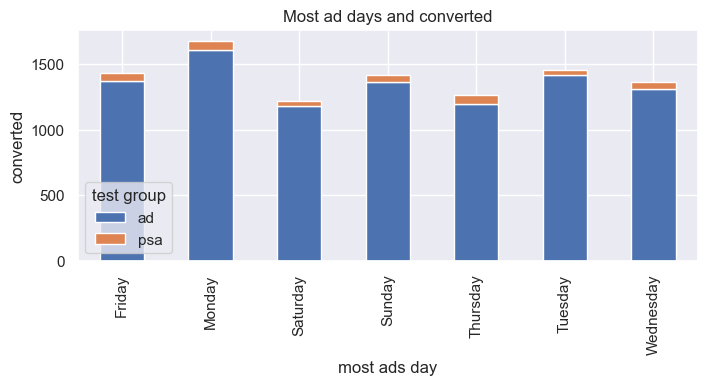

In [118]:
ax =df_workProyect.groupby(by =['most ads day', 'test group']).sum()['converted'].unstack('test group').plot(kind= 'bar', figsize= (8,3), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()